In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("credit_score.csv")

In [3]:
df=df.drop(columns=["ID","Customer_ID","Name","SSN","Type_of_Loan","Credit_History_Age"])

In [4]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4,3,...,4.0,_,809.98,26.822620,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,February,23,Scientist,19114.12,NaN,3,4,3,4,-1,...,4.0,Good,809.98,31.944960,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,March,-500,Scientist,19114.12,NaN,3,4,3,4,3,...,4.0,Good,809.98,28.609352,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,April,23,Scientist,19114.12,NaN,3,4,3,4,5,...,4.0,Good,809.98,31.377862,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4,6,...,4.0,Good,809.98,24.797347,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [5]:
df.shape

(100000, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  object 
 4   Monthly_Inhand_Salary     84998 non-null   float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  object 
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    92998 non-null   object 
 11  Changed_Credit_Limit      100000 non-null  object 
 12  Num_Credit_Inquiries      98035 non-null   float64
 13  Credit_Mix                100000 non-null  ob

In [7]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [8]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [9]:
df['Age']=df['Age'].str.replace("_","")
df['Age']=df['Age'].astype(int)
df['Occupation']=df['Occupation'].replace("______",np.nan)
df['Annual_Income']=df['Annual_Income'].str.replace("_","")
df['Annual_Income']=df['Annual_Income'].astype(float)
df['Num_of_Loan']=df['Num_of_Loan'].str.replace("_","")
df['Num_of_Loan']=df['Num_of_Loan'].astype(int)
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].str.replace("_","")
df['Num_of_Delayed_Payment']=df['Num_of_Delayed_Payment'].astype(float)
df['Credit_Score']=df['Credit_Score'].replace(["Poor","Standard","Good"],[0,1,2])
df['Monthly_Balance']=df['Monthly_Balance'].str.replace("_","")
df['Monthly_Balance']=df['Monthly_Balance'].astype(float)
df['Payment_Behaviour']=df['Payment_Behaviour'].replace("!@9#%8",np.nan)
df['Amount_invested_monthly']=df['Amount_invested_monthly'].str.replace("_","")
df['Amount_invested_monthly']=df['Amount_invested_monthly'].astype(float)
df['Payment_of_Min_Amount']=df["Payment_of_Min_Amount"].replace("NM","No")
df['Payment_of_Min_Amount']=df["Payment_of_Min_Amount"].replace(["Yes","No"],[1,0])
df['Outstanding_Debt']=df['Outstanding_Debt'].str.replace("_","")
df['Outstanding_Debt']=df['Outstanding_Debt'].astype(float)
df['Credit_Mix']=df["Credit_Mix"].replace("_",np.nan)
df['Credit_Mix']=df["Credit_Mix"].replace(["Standard","Good","Bad"],[1,2,0])
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].replace("_",np.nan)
df['Changed_Credit_Limit']=df['Changed_Credit_Limit'].astype(float)

In [10]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              2868
Credit_Score                    0
dtype: int64

In [11]:
df=df.fillna(method="ffill")

In [12]:
df=df.fillna(method="bfill")

In [13]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

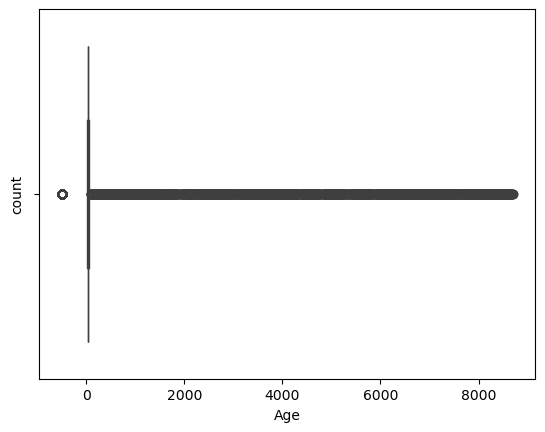

In [14]:
sns.boxplot(x=df["Age"])
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

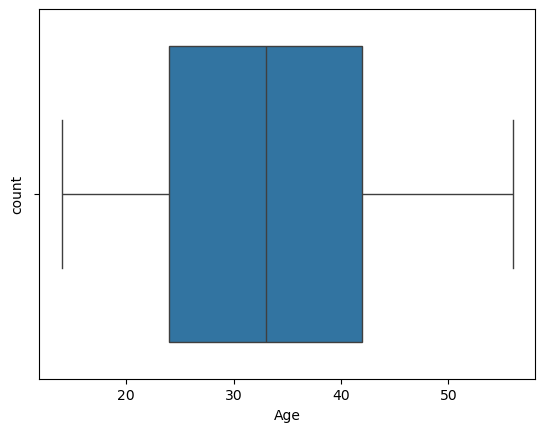

In [15]:
col_names=["Age"]
Q1=df.Age.quantile(0.25)
Q3=df.Age.quantile(0.75)
IQR=Q3-Q1
data=df[(df.Age>=Q1-1.5*IQR) & (df.Age<=Q3+1.5*IQR)]
sns.boxplot(x=data["Age"])
plt.xlabel("Age")
plt.ylabel("count")
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Month"]=le.fit_transform(df["Month"])
df["Occupation"]=le.fit_transform(df["Occupation"])
df["Payment_Behaviour"]=le.fit_transform(df["Payment_Behaviour"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  int32  
 1   Age                       100000 non-null  int32  
 2   Occupation                100000 non-null  int32  
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  int64  
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  int64  
 8   Num_of_Loan               100000 non-null  int32  
 9   Delay_from_due_date       100000 non-null  int64  
 10  Num_of_Delayed_Payment    100000 non-null  float64
 11  Changed_Credit_Limit      100000 non-null  float64
 12  Num_Credit_Inquiries      100000 non-null  float64
 13  Credit_Mix                100000 non-null  fl

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
    if((df[col].dtype!='object') & (col!='Credit_Score')):
        col_list.append(col)
        
X=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) 
                 for i in range(len(X.columns))]
print(vif_data)

                     feature       VIF
0                      Month  0.300012
1                        Age  0.974661
2                 Occupation  0.275594
3              Annual_Income  0.985001
4      Monthly_Inhand_Salary  0.365970
5          Num_Bank_Accounts  0.979247
6            Num_Credit_Card  0.970567
7              Interest_Rate  0.976430
8                Num_of_Loan  0.997697
9        Delay_from_due_date  0.332213
10    Num_of_Delayed_Payment  0.981707
11      Changed_Credit_Limit  0.299307
12      Num_Credit_Inquiries  0.979793
13                Credit_Mix  0.321474
14          Outstanding_Debt  0.396141
15  Credit_Utilization_Ratio  0.024506
16     Payment_of_Min_Amount  0.476749
17       Total_EMI_per_month  0.972258
18   Amount_invested_monthly  0.911321
19         Payment_Behaviour  0.310525
20           Monthly_Balance  1.000208


In [18]:
X=df.drop(columns="Credit_Score")
y=df["Credit_Score"]

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc=StandardScaler()

In [23]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr=LogisticRegression()

In [26]:
lr.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_pred=lr.predict(x_test)

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test,y_pred)

0.6187

In [30]:
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

,Actual Value,Predicted Value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1


Decision Tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
dt=DecisionTreeClassifier()

In [33]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [34]:
y_pred=dt.predict(x_test)

In [35]:
accuracy_score(y_test,y_pred)

0.6385

In [36]:
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

,Actual Value,Predicted Value
75721,2,1
80184,0,1
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,0
53421,1,1


Hyperparameter Tuning on Decision Tree 

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters={'max_features':['log2','sqrt','auto'],
            'criterion':['entropy','gini'],
            'max_depth':[2,3,5,10,50],
            'min_samples_split':[2,3,50,100],
            'min_samples_leaf':[1,5,8,10]
           }

In [39]:
grid_obj=GridSearchCV(dt,parameters)

In [40]:
grid_obj=grid_obj.fit(x_train,y_train)

In [41]:
dt=grid_obj.best_estimator_

In [42]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=50, max_features='sqrt', min_samples_leaf=8,
                       min_samples_split=50)

In [43]:
y_pred=dt.predict(x_test)

In [44]:
acc_dt=round(accuracy_score(y_test,y_pred)*100,2)

In [45]:
print("Accuracy of Decision Tree model:",acc_dt)

Accuracy of Decision Tree model: 67.27


Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf=RandomForestClassifier()

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred=rf.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred)

0.7575

In [51]:
pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred})

,Actual Value,Predicted Value
75721,2,2
80184,0,0
19864,2,2
76699,0,0
92991,2,2
...,...,...
32595,1,1
29313,1,1
37862,0,1
53421,1,1
